             ┌───┐                                                           »
q_0 -> 0 ────┤ X ├───────────────────────────────────────────────────────────»
             └───┘                                                           »
q_1 -> 1 ──────────────────────────────────────────────■─────────────■───────»
             ┌───┐                                     │       ┌───┐ │       »
q_2 -> 2 ────┤ X ├───────────────────■────────■────────┼───────┤ H ├─┼───────»
             └───┘             ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4) »
q_3 -> 3 ──────────────■───────┤ H ├─┼────────■────────┼─────────────■───────»
         ┌───────────┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)               »
q_4 -> 4 ┤ U2(-π,-π) ├─■─────────────■─────────────────■─────────────────────»
         └───────────┘                                                       »
    c: 5/════════════════════════════════════════════════════════════════════»
                                                    

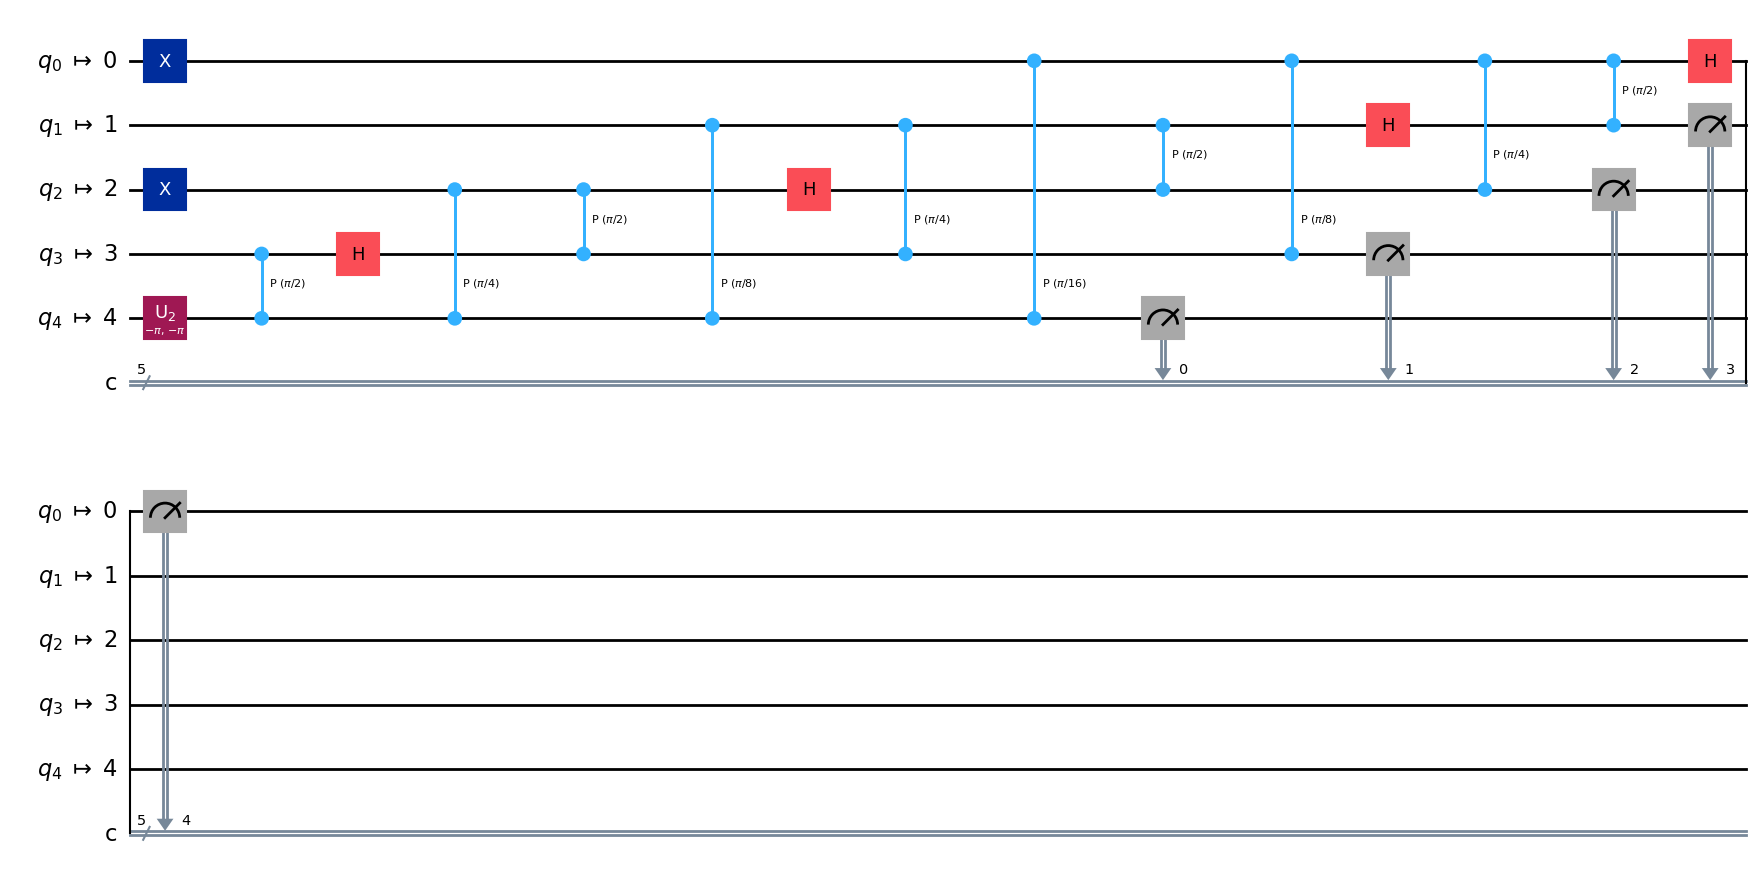

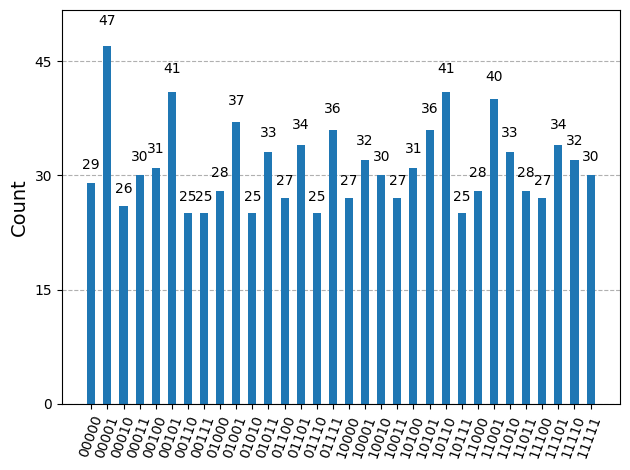

In [1]:
# working_qft_fixed.py

# Enable inline plotting for Jupyter
%matplotlib inline

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.circuit.library import QFTGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Initialize simulator
backend = AerSimulator()

# Build circuit
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q, c)

# Set initial state |10101>
qc.x(q[4])
qc.x(q[2])
qc.x(q[0])

# Append QFT as a Gate object
qc.append(QFTGate(5), q)

# Measure
qc.measure(q, c)

# Transpile (convert composite gates to Aer basis gates)
qc_t = transpile(qc, backend)

# Display the transpiled circuit
print(qc_t)
qc_t.draw('mpl', filename='qft_decomposed.png')

# Run the circuit on simulator
job = backend.run(qc_t, shots=1000)
result = job.result()
counts = result.get_counts()

print("Counts:", counts)

# Plot histogram inline
plot_histogram(counts)
plt.show()
